In [ ]:
import tensorflow as tf

from random import randint
from numpy import array
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from keras.models import Model, model_from_json
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
import pickle
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Lambda

tf.keras.backend.set_floatx('float64')

In [ ]:
!gdown --id 1uvC1I-EJUthBqqAUBEHOgmr40--RyPBB

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1uvC1I-EJUthBqqAUBEHOgmr40--RyPBB
To: /content/dataset.csv
100% 816k/816k [00:00<00:00, 117MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/dataset.csv')
df.head()

,Supplier Name,Region,Country,Function,Service,Avg. Cost,Rating,Average Delivery Time,Number of escalations,Year,Resources,Score
0,Walmart,APAC,China,HR,Telecommunications services,266900,76,313,252,2015,4262,47
1,Walmart,APAC,Singapore,HR,Telecommunications services,110300,78,186,215,2016,1088,68
2,Walmart,APAC,Australia,HR,Telecommunications services,496600,89,414,230,2017,6977,32
3,Walmart,Europe,Switzerland,HR,Telecommunications services,491800,87,438,166,2018,2546,44
4,Walmart,Europe,France,HR,Telecommunications services,226400,83,305,293,2019,4592,47


In [ ]:
year=df['Year']
score=df['Score']

In [ ]:
df_train=df.drop('Year',axis=1)

In [ ]:
col=df_train.columns

In [ ]:
col

Index(['Supplier Name', 'Region', 'Country', 'Function', 'Service',
       'Avg. Cost', 'Rating', 'Average Delivery Time', 'Number of escalations',
       'Resources', 'Score'],
      dtype='object')

## Preprocessing the dataset

In [ ]:
df_train.head()

,Supplier Name,Region,Country,Function,Service,Avg. Cost,Rating,Average Delivery Time,Number of escalations,Resources,Score
0,Walmart,APAC,China,HR,Telecommunications services,266900,76,313,252,4262,47
1,Walmart,APAC,Singapore,HR,Telecommunications services,110300,78,186,215,1088,68
2,Walmart,APAC,Australia,HR,Telecommunications services,496600,89,414,230,6977,32
3,Walmart,Europe,Switzerland,HR,Telecommunications services,491800,87,438,166,2546,44
4,Walmart,Europe,France,HR,Telecommunications services,226400,83,305,293,4592,47


In [ ]:
df_train=df_train.drop(['Supplier Name','Region','Country','Function','Service','Score'],axis=1)
df_train.head()

,Avg. Cost,Rating,Average Delivery Time,Number of escalations,Resources
0,266900,76,313,252,4262
1,110300,78,186,215,1088
2,496600,89,414,230,6977
3,491800,87,438,166,2546
4,226400,83,305,293,4592


In [ ]:
year

0       2015
1       2016
2       2017
3       2018
4       2019
        ... 
8395    2016
8396    2017
8397    2018
8398    2019
8399    2020
Name: Year, Length: 8400, dtype: int64

In [ ]:
def buildData(timesteps = 5):
    X = []
    y = []
    for i in range(len(df_train) - timesteps):
        X.append(df_train.iloc[i : i + timesteps])
        y.append(df_train.iloc[i + timesteps])
    return (np.array(X), np.array(y))

In [ ]:
X,y=buildData()

In [ ]:
X[0], y[0]

(array([[266900,     76,    313,    252,   4262],
        [110300,     78,    186,    215,   1088],
        [496600,     89,    414,    230,   6977],
        [491800,     87,    438,    166,   2546],
        [226400,     83,    305,    293,   4592]]),
 array([350800,     71,     99,    105,   3540]))

In [ ]:
X.shape

(8395, 5, 5)

In [ ]:
y.shape

(8395, 5)

In [ ]:
model = Sequential([LSTM(units = 128, activation='tanh', input_shape = (5,5), return_sequences=True),
                    LSTM(units = 64, activation='tanh'),
                    Dense(16, activation='relu'),
                    Dense(16, activation='relu'),
                  Dense(8, activation='relu'),
                  Dense(5)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            68608     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 5)                 45        
                                                                 
Total params: 119,509
Trainable params: 119,509
Non-trai

In [ ]:
model.compile(loss = 'mse', optimizer = 'adam')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
model.fit(X, y, epochs =100,validation_split=0.3,callbacks=es)

Epoch 1/100
184/184 [==============================] - 9s 31ms/step - loss: 20607168333.5494 - val_loss: 20768445287.1520
Epoch 2/100
184/184 [==============================] - 5s 26ms/step - loss: 20354492369.9932 - val_loss: 20115874279.8126
Epoch 3/100
184/184 [==============================] - 5s 26ms/step - loss: 18821721300.6072 - val_loss: 17394204268.7416
Epoch 4/100
184/184 [==============================] - 5s 26ms/step - loss: 14636133447.7985 - val_loss: 11733194418.6614
Epoch 5/100
184/184 [==============================] - 5s 26ms/step - loss: 8436193602.7447 - val_loss: 5645489170.6995
Epoch 6/100
184/184 [==============================] - 5s 26ms/step - loss: 3966343691.8502 - val_loss: 2995675622.0850
Epoch 7/100
184/184 [==============================] - 6s 31ms/step - loss: 2756625832.1688 - val_loss: 2657787405.2624
Epoch 8/100
184/184 [==============================] - 5s 26ms/step - loss: 2656977084.9067 - val_loss: 2642853326.9647
Epoch 9/100
184/184 [===========

KeyboardInterrupt: ignored

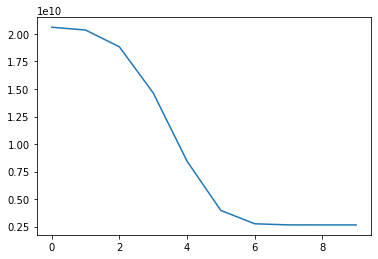

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])

In [ ]:
model.predict(X)[0]

ValueError: ignored

# Second model for score calculation

In [ ]:
df_train.head()

,Avg. Cost,Rating,Average Delivery Time,Number of escalations,Resources
0,266900,76,313,252,4262
1,110300,78,186,215,1088
2,496600,89,414,230,6977
3,491800,87,438,166,2546
4,226400,83,305,293,4592


In [ ]:
score.shape

(8400,)

In [ ]:
X=df_train

In [ ]:
y=score

In [ ]:
X.shape, y.shape

((8400, 5), (8400,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# scaler = MinMaxScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.fit(X_test)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [ ]:
model_lr=LogisticRegression(max_iter=3000)
model_lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=3000)

In [ ]:
print(len(model_lr.classes_))

59


In [ ]:
model_lr

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify'

In [ ]:
X_train_scaled

array([[-0.80190315, -1.40346558,  0.94464513,  1.25883804, -0.33665219],
       [-0.51180153,  0.18826632, -0.12594692,  1.05461682, -0.69692492],
       [-0.22344751, -1.40346558,  0.74999203, -0.91101243,  1.72486546],
       ...,
       [-1.62327521,  0.71884363,  0.01561897, -1.01312304,  1.43687922],
       [ 0.63375036,  1.51470958, -0.31175215,  0.27602341, -1.45805903],
       [ 0.71326616,  0.32091065,  0.41377304, -1.0386507 , -0.42556069]])

In [ ]:
X_test_scaled

array([[-1.67381027, -0.97189124, -0.69871007, -1.26059009,  0.34201495],
       [ 1.48452538, -0.0388064 , -1.47349323, -1.3498359 , -1.6060793 ],
       [ 1.21567603, -0.30540207, -0.09313243, -0.77611287,  0.30784452],
       ...,
       [ 0.24592869, -0.43869991,  0.67274518, -0.34263324,  0.53982378],
       [ 1.41323306, -0.83859341, -1.28647661, -0.82711047,  0.21444534],
       [ 0.1909563 ,  0.62768277,  1.09130619,  0.89405862,  0.34353364]])

In [ ]:
pred=model_lr.predict([X_test_scaled[0]])

In [ ]:
pred

array([65])

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1.h5")
print("Saved model to disk")
 

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model1.h5")
print("Loaded model from disk")

# Saving the pickle model

filename2='modul2.pkl'
pickle.dump(model_lr, open(filename2, 'wb'))



Saved model to disk
Loaded model from disk


In [ ]:
# loaded_model = pickle.load(open(filename2, 'rb'))
# result = loaded_model.score(X_test, Y_test)

# Pipeline

In [ ]:
# LSTM prediction

In [ ]:
def buildData(timesteps = 5):
    X = []
    y = []
    for i in range(len(df_train) - timesteps):
        X.append(df_train.iloc[i : i + timesteps])
        y.append(df_train.iloc[i + timesteps])
    return (np.array(X), np.array(y))

In [ ]:
def preprocessing(df):
  score=df['Score']
  df_train=df.drop(['Supplier Name','Region','Country','Function','Service','Score','Year'],axis=1)
  
  X,y=buildData()
  return X,y

In [ ]:
  X,y=preprocessing(df)

In [ ]:
def pipeline_lstm_model(df,X):
  json_file = open('model.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new modelz
  loaded_model.load_weights("model1.h5")
  print("Loaded model from disk")

  return loaded_model.predict(X)

In [ ]:
pipeline_lstm_model(df,X[:5])

Loaded model from disk


array([[3.00151835e+05, 8.28728403e+01, 2.84791730e+02, 1.91020817e+02,
        5.84560710e+03],
       [3.00151835e+05, 8.28728403e+01, 2.84791730e+02, 1.91020817e+02,
        5.84560710e+03],
       [3.00151835e+05, 8.28728403e+01, 2.84791730e+02, 1.91020817e+02,
        5.84560710e+03],
       [3.00151835e+05, 8.28728403e+01, 2.84791730e+02, 1.91020817e+02,
        5.84560710e+03],
       [3.00151835e+05, 8.28728403e+01, 2.84791730e+02, 1.91020817e+02,
        5.84560710e+03]])

## Predicting scores

In [ ]:
def predict_scores(X):
  filename="modul2.pkl"
  pickle_model = pickle.load(open(filename, 'rb'))
  return pickle_model.predict(X)

In [ ]:
predict_scores(X_test_scaled)

array([65, 63, 48, ..., 46, 54, 42])